Use OpenCV or NLTK kind of library to read text (OCR) from it and categories all images in the categories like Home utility, Grocery, Shopping, Vehicle expenditure, Entertainment and Investment.
1. Extract the text from the images and store it in categorical wise CSV file. Each category
have separate CSV file. [Marks: 15]
2. Each CSV file store the information like date of bill, organization name which generate
the bill, bill amount and tax information(if any) [Marks: 15]
3. Show table which is showing the expenses details category wise and display them in
pie chart. [Marks: 05]
4. Give suggestion to user, based on his expenditure which lead to increase the saving.
[Marks: 05]


## **Persiapkan Pustaka yang akan digunakan**

In [ ]:
# !apt-get install tesseract-ocr
# !apt-get install libtesseract-dev
# !pip install pytesseract

In [ ]:
# Pemrosesan Gambar
from PIL import Image     # manipulasi gambar
import pytesseract        # mengenali teks dari gambar
import cv2                # pengolahan gambar dan computer vision
# Argument Handling
import argparse           # menghandle argumen baris perintah
# Manajemen Sistem Operasi dan File
import os                 # berinteraksi dengan sistem operasi
# Analisis dan Visualisasi Data
import pandas as pd       # analisis data
import seaborn as sns     # membuat visualisasi data statistik
import matplotlib.pyplot as plt # membuat plot/grafik
import numpy as np              # komputasi numerik
import csv                      # membaca dan menulis file CSV
# Pemrosesan Bahasa Alami
import nltk                     # pemrosesan bahasa alami
import re                       # Modul untuk ekspresi reguler
from nltk.tokenize import word_tokenize   # Modul untuk tokenisasi kata
from nltk.corpus import wordnet           # pemrosesan bahasa alami

read the below dummy model as i have elaborated every step after the code.
the below code shows how i created 7 csv files .i have gave demo of one bill in this notbook.

In [ ]:
# # lets make a protopye of first question
# # to scan 100 images

# #question 1
#     for i in range(0,100):
#      image=cv2.imread('bill{}.png'.format(i),0)

#      text=(pytesseract.image_to_string(image)).lower()
#      print(text)

#      use the operaations to create list which contains date,organisation name and amount
#      store it in a list

#     #create a csv file
#     file=['entertainment','investment','shopping','grocery','transport','home','others']
#     for i in file:
#     with open('{}.csv',format(file[i]), 'a', newline='') as csvfile:
#         w = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
#         w.writerow(['date','organisation','amount'])
#     #question 2->appening the contents
#     #after identifing the category of the file
#     #add the contents in thier respective csv file
#     row_contents = [st,head,x]
#     from csv import writer

#         def append_list_as_row(file, list_of_elem):

#             with open(file, 'a+', newline='') as write_obj:

#             csv_writer = writer(write_obj)

#             csv_writer.writerow(list_of_elem)
#     append_list_as_row(filename, row_contents)
#     #this is how appending was done.now you can save the notebook to make sure that csv file is saved.
#     #and then begain with the data analysis part.

# **Question 1**

Extract the text from the images and store it in categorical wise CSV file. Each category have separate CSV file

## **Extract Text From The Images**

### Pilih File Gambar

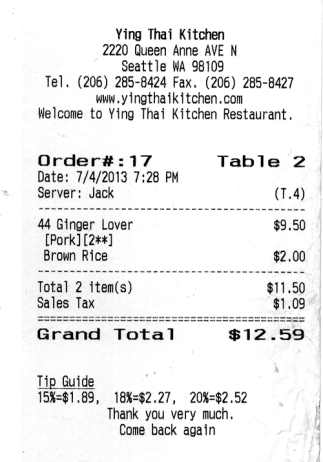

In [ ]:
Image.open('bill3.png')

In [ ]:
# Read an image
image = cv2.imread('bill3.png', 0)
image

array([[255, 255, 255, ..., 255, 241, 239],
       [255, 255, 255, ..., 255, 241, 240],
       [255, 255, 255, ..., 255, 244, 242],
       ...,
       [255, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 245, 255, 255],
       [255, 255, 255, ..., 244, 255, 255]], dtype=uint8)

### Ekstrak Teks dari Gambar

In [ ]:
text = pytesseract.image_to_string(image).lower()
print(text)

ying thai kitchen
2220 queen anne ave n
seattle wa 98109
« (206) 285-8424 fax. (206) 285-8427
‘uw .yingthaikitchen.com
welcome to ying thai kitchen restaurant,

 

 

 

order#:17 table 2
date: 7/4/2013 7:28 pm

server: jack (1.4)
44 ginger lover $9.50
[pork] [24#]

brown rice $2.00
total 2 iten(s) $11.50
sales tax $1.09
grand total $12.59
tip guide

tek=$1.89, 18%=62.27, 20%=82.52
thank you very much,
cone back again



### Identifikasi Tanggal

Cara identifikasi tanggal berikut ini hanya berlaku untuk format tanggal D/M/YYYY.

In [ ]:
match = re.findall(r'\d+[/.-]\d+[/.-]\d+', text)

st = " ".join(match)
print(st)

7/4/2013


Cara lain untuk identifikasi tanggal. Terkadang format tanggal pada semua struk tidak sama. Jadi jika tanggalnya seperti 1/03/17, bagian tahun akan berubah dari YY menjadi YYYY. Oleh karena itu, kode dibawah ini akan bekerja :

In [ ]:
# Formatting the date if required
date_parts = st.split('/')

# Add '20' to the year if it has only two digits
if len(date_parts[2]) == 2:
    date_parts[2] = '20' + date_parts[2]

d = '/'.join(date_parts)
# Output -> '01/07/2017'
print(d)

7/4/2013


Punkt adalah model machine learning tanpa pengawasan yang telah dilatih sebelumnya untuk tokenisasi (memisahkan teks menjadi kata).

WordNet adalah basis data leksikal besar untuk bahasa Inggris dan digunakan untuk berbagai tugas pemrosesan bahasa alami.

In [ ]:
# Mengunduh model tokenizer Punkt
nltk.download('punkt',quiet=True)
# Mengunduh basis data leksikal WordNet
nltk.download('wordnet',quiet=True)

True

### Identifikasi Judul

Cara identifikasi judul ini menggunakan Punkt tokenizer. Punkt tokenizer ini akan membagi teks menjadi kalimat-kalimat. Dimana judul terdapat pada baris pertama sehingga kita hanya akan mengambil baris pertama.

In [ ]:
# Mengekstrak judul dari teks
sent_tokens = nltk.sent_tokenize(text)
title = sent_tokens[0].splitlines()[0]
print(title)

ying thai kitchen


Ada cara lain untuk mengidentifikasi judul. Cara ini akan membagi teks menjadi baris-baris berdasarkan karakter newline (\n). Dimana kita hanya mengambil baris pertama sebagai judul.

In [ ]:
# Cara lain untuk mengekstrak judul
for i in text.split('\n'):
    break
head = i
print(head)

ying thai kitchen


### Identifikasi Total Harga

Cara untuk mengidentifikasi harga tertinggi yang tercantum dalam tagihan dengan memperhitungkan simbol mata uang yang mungkin digunakan.

In [ ]:
# Mengekstrak harga dari teks
price = re.findall(r'[\$\£\€](\d+(?:\.\d{1,2})?)', text)
price = list(map(float, price))
max_price = max(price)
print(max_price)

12.59


In [ ]:
x = max_price

- Kode diatas menggunakan ekprresi reguler re.findall untuk mencari pola harga dalam teks. Pola ini mencocokan simbol mata uang seperti $, £, €. Diikuti oleh satu/lebih digit (\d+). Opsional satu/dua digit desimal (.\d{1,2}). Outputnya daftar harga yang ditemukan.
- Daftar harga yang ditemukan dikonversi menjadi daftar nilai float. Hal ini perlu karena hasil dari re.findall awalnya berupa string. Output yang diinginkan berupa nilai numerik.
- Nilai maksimum yang ditemukan dalam daftar harga. Hal ini untuk menemukan harga tertinggi diantara item-item yang terdaftar dalam tagihan

Secara keseluruhan, kode ini berguna untuk menemukan dan mencetak harga tertinggi yang tercantum dalam tagihan, dengan memperhitungkan simbol mata uang yang mungkin digunakan.

Ketika pemindaian atau ekstraksi informasi dari beberapa tagihan, ada beberapa tagihan (antara 5-6 tagihan) yang tidak dapat di-scan dengan benar menggunakan metode yang telah digunakan sebelumnya. Maka untuk menangani kasus-kasus tersebut perlu alternatif lain.

In [ ]:
# for i in range(len(new_words)):
#     if new_words[i] == 'grand' and new_words[i+1] == 'total':
#         break
# price = new_words[i+2]
# print(price)
# x = price

- Melakukan iterasi melalui indeks dari new_words
- Mengecek apakah ada dua kata berturut-turut dalam new_words yaitu grand dan total. Bila ya maka looping selesai.
- Mengambil kata yang berada dua indeks setelah kata 'total'. Kata ini diasumsikan sebagai nilai price.

Dengan menggunakan pendekatan ini, diharapkan dapat mengatasi kendala saat menangani tagihan yang tidak dapat di-scan secara benar, terutama untuk menemukan nilai total (grand total) dalam tagihan tersebut.

### Pra-pemrosesan Teks

Hingga tahap ini, kita berhasil mengekstrak informasi tanggal, judul, dan jumlah (amount) dari teks.

Sebelum kita akan mengategorikan tagihan (bill), apakah itu berkaitan dengan belanja atau kelontong, dan mungkin kategori lainnya.

Kita perlu melakukan tokenisasi pada teks. Tokenisasi pada teks ini yaitu memecah teks menjadi kata-kata atau token-token. Kemudian, program akan mencari kata kunci (keywords) dalam token-token tersebut untuk menentukan kategori tagihan.

In [ ]:
# Tokenisasi teks
tokens = word_tokenize(text)
print(tokens)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '«', '(', '206', ')', '285-8424', 'fax', '.', '(', '206', ')', '285-8427', '‘', 'uw', '.yingthaikitchen.com', 'welcome', 'to', 'ying', 'thai', 'kitchen', 'restaurant', ',', 'order', '#', ':17', 'table', '2', 'date', ':', '7/4/2013', '7:28', 'pm', 'server', ':', 'jack', '(', '1.4', ')', '44', 'ginger', 'lover', '$', '9.50', '[', 'pork', ']', '[', '24', '#', ']', 'brown', 'rice', '$', '2.00', 'total', '2', 'iten', '(', 's', ')', '$', '11.50', 'sales', 'tax', '$', '1.09', 'grand', 'total', '$', '12.59', 'tip', 'guide', 'tek=', '$', '1.89', ',', '18', '%', '=62.27', ',', '20', '%', '=82.52', 'thank', 'you', 'very', 'much', ',', 'cone', 'back', 'again']


Teks berhasil ditokenisasi. Namun pada hasilnya terdapat tanda baca yang tidak diperlu untuk proses analisis teks lanjutan. Maka perlu dihilangkan agar dapat bekerja dengan kata-kata dalam bentuk yag lebih bersih.

In [ ]:
# Menghilangkan tanda baca yang tidak diperlukan
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(text)
print(new_words)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '206', '285', '8424', 'fax', '206', '285', '8427', 'uw', 'yingthaikitchen', 'com', 'welcome', 'to', 'ying', 'thai', 'kitchen', 'restaurant', 'order', '17', 'table', '2', 'date', '7', '4', '2013', '7', '28', 'pm', 'server', 'jack', '1', '4', '44', 'ginger', 'lover', '9', '50', 'pork', '24', 'brown', 'rice', '2', '00', 'total', '2', 'iten', 's', '11', '50', 'sales', 'tax', '1', '09', 'grand', 'total', '12', '59', 'tip', 'guide', 'tek', '1', '89', '18', '62', '27', '20', '82', '52', 'thank', 'you', 'very', 'much', 'cone', 'back', 'again']


Terlihat bahwa output dari new_words terdapat kata-kata umum yang sering tidak memberikan kontribusi signifikan terhadap makna. Kata-kata umum yang dimaksudkan seperti a, an, the, and, is, dll. Maka disini kita akan menggunakan STOPWORDS.

Pertama, kita perlu mengunduh daftar STOPWORDS dari modul NLTK.

In [ ]:
# Mengunduh Stopwords dari NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membuat Set Stopwords dalam Bahasa Inggris
stop_words = set(nltk.corpus.stopwords.words('english'))

Setelah set stopwords dibuat, kita akan membuat daftar kata-kata filtered_list yang tidak termasuk dalam stopwords. Hal ini dilakukan dengan menggunakan list comprehension dan memeriksa apkah setiap kata dalam new_words tidak ada dalam set stopwords.

In [ ]:
# Membuat daftar kata-kata dari new_words yang tidak termasuk dalam stopwords
filtered_list = [w for w in new_words if w not in stop_words]
print(filtered_list)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '206', '285', '8424', 'fax', '206', '285', '8427', 'uw', 'yingthaikitchen', 'com', 'welcome', 'ying', 'thai', 'kitchen', 'restaurant', 'order', '17', 'table', '2', 'date', '7', '4', '2013', '7', '28', 'pm', 'server', 'jack', '1', '4', '44', 'ginger', 'lover', '9', '50', 'pork', '24', 'brown', 'rice', '2', '00', 'total', '2', 'iten', '11', '50', 'sales', 'tax', '1', '09', 'grand', 'total', '12', '59', 'tip', 'guide', 'tek', '1', '89', '18', '62', '27', '20', '82', '52', 'thank', 'much', 'cone', 'back']


## **Buat 6 Daftar Kategori Berdasarkan Kata Kunci yang Berkaitan**

Dalam enam blok berikutnya, kita akan membuat enam daftar kategori. Setiap daftar ini akan berisi beberapa kata yang berkaitan dengan kategori tagihan tertentu. Sebagai contoh, kata-kata seperti "kitchen", "food", atau "restaurant" mungkin terkandung dalam tagihan dari restoran.

Oleh karena itu, kita akan membandingkan kata-kata dalam teks tagihan dengan setiap daftar kategori, dan kemudian mengalokasikan tagihan tersebut ke dalam kategori yang sesuai berdasarkan kemiripan kata-kata tersebut.

### **Entertainment**

In [ ]:
entertainment = []
for syn in wordnet.synsets("entertainment"):
    for l in syn.lemmas():
        entertainment.append(l.name())

l = ['happy','restaurant','food','kitchen','hotel','room','park','movie','cinema','popcorn','combo meal']
entertainment += l

Kode ini membuat daftar kata kunci yang berkaitan dengan kategori "entertainment". Kita menggunakan WordNet (dari NLTK) untuk mendapatkan sinonim kata "entertainment" dan menambahkan kata-kata tambahan yang mungkin terkait dengan tagihan hiburan, seperti restoran, makanan, dll.

### **Home Utility**

In [ ]:
home_utility=[]
for syn in wordnet.synsets("home"):
    for l in syn.lemmas():
         home_utility.append(l.name())
l2 = ['internet','telephone','elecricity','meter','wifi','broadband','consumer','reading','gas','water','postpaid','prepaid']
home_utility += l2

Kode ini membuat daftar kata kunci yang berkaitan dengan kategori "home utility". Kita menggunakan WordNet (dari NLTK) untuk mendapatkan sinonim kata "home" dan menambahkan kata-kata tambahan yang mungkin terkait dengan tagihan utilitas rumah, seperti internet, telepon, listrik, dll.

### **Grocery**

In [ ]:
grocery=[]
for syn in wordnet.synsets("grocery"):
    for l in syn.lemmas():
         grocery.append(l.name())
l3=['bigbasket','milk','atta','sugar','suflower','oil','bread','vegetabe','fruit','salt','paneer']
grocery+=l3


Kode ini membuat daftar kata kunci yang berkaitan dengan kategori "grocery". Kita menggunakan WordNet (dari NLTK) untuk mendapatkan sinonim kata "grocery" dan menambahkan kata-kata tambahan yang mungkin terkait dengan tagihan belanja bahan makanan, seperti susu, roti, sayuran, dll.

### **Investment**

In [ ]:
investment=[]
for syn in wordnet.synsets("investment"):
    for l in syn.lemmas():
         investment.append(l.name())
l1=['endowment','grant','loan','applicant','income','expenditure','profit','interest','expense','finance','property','money','fixed','deposit','kissan','vikas']
investment=investment+l1

Kode ini membuat daftar kata kunci yang berkaitan dengan kategori "investment". Kita menggunakan WordNet (dari NLTK) untuk mendapatkan sinonim kata "investment" dan menambahkan kata-kata tambahan yang mungkin terkait dengan tagihan investasi, seperti pendapatan, pengeluaran, keuntungan, dll.

### **Travel and Transportation**

In [ ]:
transport=[]
for syn in wordnet.synsets("car"):
    for l in syn.lemmas():
         transport.append(l.name())
l4=['cab','ola','uber','autorickshaw','railway','air','emirates','aerofloat','taxi','booking','road','highway']
transport+=l4

Kode ini membuat daftar kata kunci yang berkaitan dengan kategori "transport" atau "car". Kita menggunakan WordNet untuk mendapatkan sinonim kata "car" dan menambahkan kata-kata tambahan yang mungkin terkait dengan tagihan transportasi atau kendaraan, seperti taksi, pemesanan, jalan, dll.

### **Shopping**

In [ ]:
shopping=[]
for syn in wordnet.synsets("dress"):
    for l in syn.lemmas():
         shopping.append(l.name())
l4=['iphone','laptop','saree','max','pantaloons','westside','vedic','makeup','lipstick','cosmetics','mac','facewash','heels','crocs','footwear','purse']
shopping+=l4

Kode ini membuat daftar kata kunci yang berkaitan dengan kategori "shopping" atau "dress". Kita menggunakan WordNet untuk mendapatkan sinonim kata "dress" dan menambahkan kata-kata tambahan yang mungkin terkait dengan tagihan belanja pakaian atau barang-barang fashion, seperti smartphone, laptop, makeup, dll.

## **Penentu Kategori Tagihan Berdasarkan Kata Kunci dalam filtered_list**

Tahap ini bertujuan untuk menentukan kategori tagihan berdasarkan kata-kata kunci dalam filtered_list. Setiap kategori (entertainment, investment, grocery, shopping, transport, home_utility) memiliki daftar kata-kata kunci yang telah ditentukan sebelumnya. Jika kata dalam filtered_list cocok dengan salah satu dari daftar kata-kunci tersebut, variabel yang sesuai dengan kategori tersebut akan diatur menjadi True.

Namun, ada beberapa masalah potensial dalam logika ini. Jika tagihan termasuk dalam lebih dari satu kategori, maka hanya kategori pertama yang ditemukan akan diatur menjadi True, dan loop akan dihentikan. Selain itu, karena variabel kategori (e, inv, g, s, t, h) tidak direset ke False setiap kali loop dimulai, hasilnya mungkin tidak sesuai dengan harapan jika suatu tagihan dapat masuk ke beberapa kategori.

In [ ]:
e, inv, g, s, t, h = False, False, False, False, False, False

for word in filtered_list:
    if word in entertainment:
        e=True
        break
    elif word in investment:
        inv=True
        break
    elif word in grocery:
        g=True
        break
    elif word in shopping:
        s=True
        break
    elif word in transport:
        t=True
        break
    elif word in home_utility:
        h=True
        break

## **Buat file CSV Berdasarkan Daftar Kategori**

In [ ]:
categories = ['entertainment', 'investment', 'shopping', 'grocery', 'transport', 'home', 'others']

# Membuat direktori 'output' jika belum ada
output_directory = 'output'
os.makedirs(output_directory, exist_ok=True)

for category in categories:
    csv_file_path = os.path.join(output_directory, f'{category}.csv')
    with open(csv_file_path, 'a', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        # Menulis header hanya jika file CSV baru dibuat
        if os.path.getsize(csv_file_path) == 0:
            spamwriter.writerow(['Date', 'Organisation', 'Amount'])

# **Question 2**

In [ ]:
# this code the category in which the bill belongs to
# if e is true then entertainment categrory and we will ,ake filename as entertainment.csv using
# formatting
if(e):
    print("entertainment category")
    filename='{}.csv'.format('output/entertainment')
    #df=pd.read_csv('entertainment.csv')
elif(inv):
    print("investment category")
    filename='{}.csv'.format('output/investment')
    #df=pd.read_csv('investment.csv')
elif(s):
    print("shopping category")
    filename='{}.csv'.format('output/shopping')
    #df=pd.read_csv('shopping.csv')
elif(g):
    print("grocery category")
    filename='{}.csv'.format('output/grocery')
    #df=pd.read_csv('grocery.csv')
elif(t):
    print("transport category")
    filename='{}.csv'.format('output/transport')
    #df=pd.read_csv('transport.csv')
elif(h):
    print("home utility category")
    filename='{}.csv'.format('output/home')
    #df=pd.read_csv('home.csv')
else:
    print("others")
    filename='{}.csv'.format('output/others')
    #df=pd.read_csv('others.csv')




entertainment category


In [ ]:
# add the contents in thier respective csv file
row_contents = [st, head, x]
from csv import writer

def append_list_as_row(file, list_of_elem):

    with open(file, 'a+', newline='') as write_obj:

        csv_writer = writer(write_obj)

        csv_writer.writerow(list_of_elem)
append_list_as_row(filename, row_contents)

In [ ]:
#after this make sure you save it
entertainment = pd.read_csv('output/entertainment.csv')
home = pd.read_csv('output/home.csv')
investment = pd.read_csv('output/investment.csv')
shopping = pd.read_csv('output/shopping.csv')
grocery = pd.read_csv('output/grocery.csv')
transport = pd.read_csv('output/transport.csv')
other = pd.read_csv('output/others.csv')

In [ ]:
# Pastikan kolom 'Date' dalam format yang benar dan tidak ada nilai yang hilang
entertainment['Date'] = pd.to_datetime(entertainment['Date'], errors='coerce')
investment['Date'] = pd.to_datetime(investment['Date'], errors='coerce')
shopping['Date'] = pd.to_datetime(shopping['Date'], errors='coerce')
grocery['Date'] = pd.to_datetime(grocery['Date'], errors='coerce')
transport['Date'] = pd.to_datetime(transport['Date'], errors='coerce')
other['Date'] = pd.to_datetime(other['Date'], errors='coerce')
home['Date'] = pd.to_datetime(home['Date'], errors='coerce')

# **Question 3**

In [ ]:
#question3
entertainment.head()

,Date,Organisation,Amount
0,2013-07-04,ying thai kitchen,12.59


In [ ]:
investment.head()

,Date,Organisation,Amount


In [ ]:
shopping.head()

,Date,Organisation,Amount


In [ ]:
grocery.head()

,Date,Organisation,Amount


In [ ]:
transport.head()

,Date,Organisation,Amount


In [ ]:
other.head()

,Date,Organisation,Amount


In [ ]:
#lets do some statistics
entertainment.shape
#3->columns 11->rows
#similarliy do for others

(1, 3)

In [ ]:
#getting statistical info
entertainment.describe()

,Amount
count,1.00
mean,12.59
std,NaN
min,12.59
25%,12.59
50%,12.59
75%,12.59
max,12.59


In [ ]:
#oh my 7346 is too much,lets see where have i used this amount
entertainment[entertainment['Amount']==entertainment['Amount'].max()]
#dubai trip was awesome!!!:)


,Date,Organisation,Amount
0,2013-07-04,ying thai kitchen,12.59


In [ ]:
#lets check the data type of the data set -entertainment
entertainment.dtypes
#everything looks fine


Date            datetime64[ns]
Organisation            object
Amount                 float64
dtype: object

In [ ]:
#now lets check for missing values
entertainment.isnull().any()
#woo hooo there are no missing values
#if True was displayed then we would have to use some pandas function to get rid of that
#eg df.dropna() or .fillna() etc..

Date            False
Organisation    False
Amount          False
dtype: bool

In [ ]:
#lets check for other data frames as well
investment.isnull().any()

Date            False
Organisation    False
Amount          False
dtype: bool

In [ ]:
shopping.isnull()

,Date,Organisation,Amount


In [ ]:
#similary we can check for the other category
grocery.isnull().any()
transport.isnull().any()
other.isnull().any()
home.isnull().any()

Date            False
Organisation    False
Amount          False
dtype: bool

<BarContainer object of 1 artists>

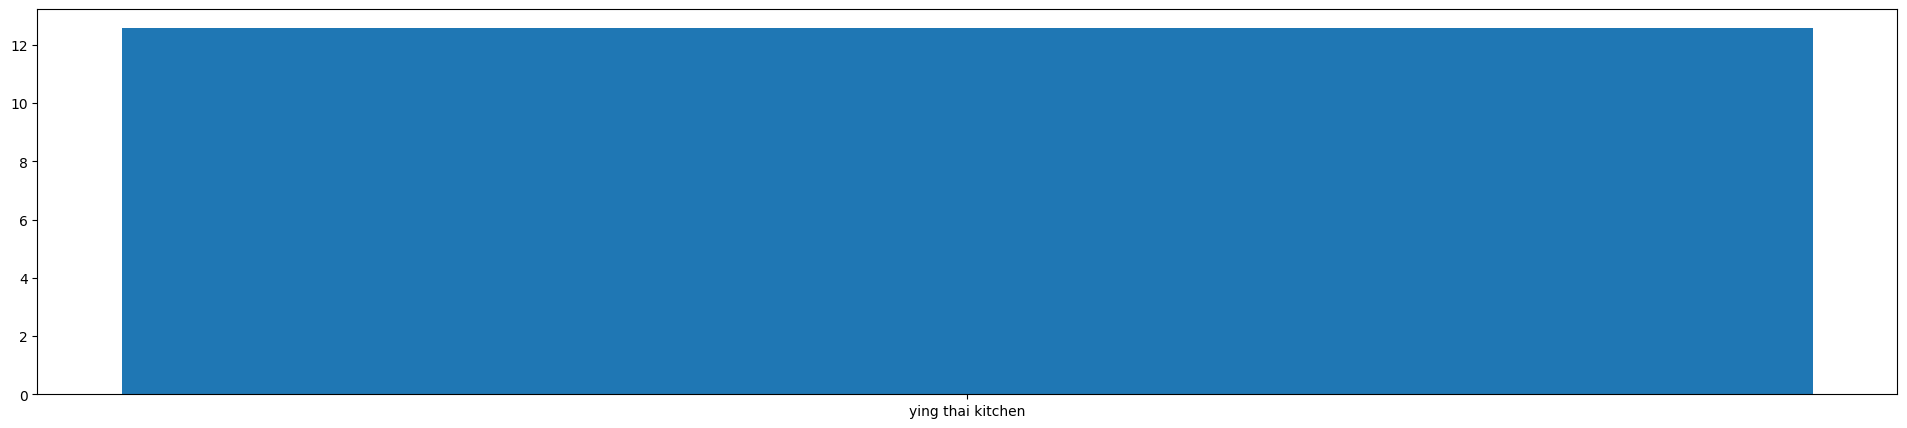

In [ ]:
#since everything looks fine we will move to the next important step
#DATA ANALYSIS
plt.figure(figsize=(24,5))
plt.bar(entertainment['Organisation'],entertainment['Amount'])

<Axes: title={'center': 'entertainment expenditure'}, ylabel='Organisation'>

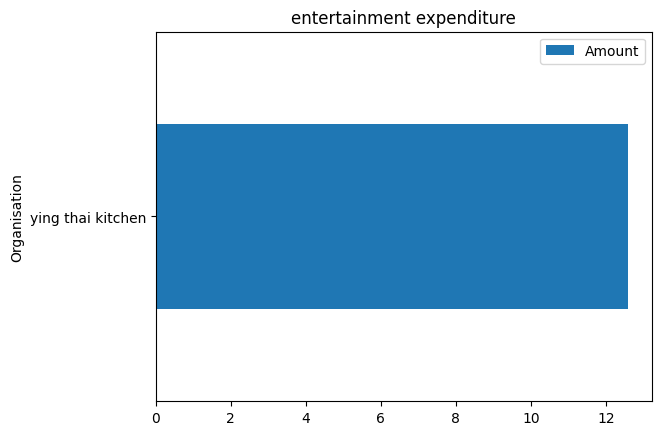

In [ ]:
#lets make it more readble and analyzable
entertainment.plot(x='Organisation',
                   y='Amount',
                   kind='barh',
                   title='entertainment expenditure')

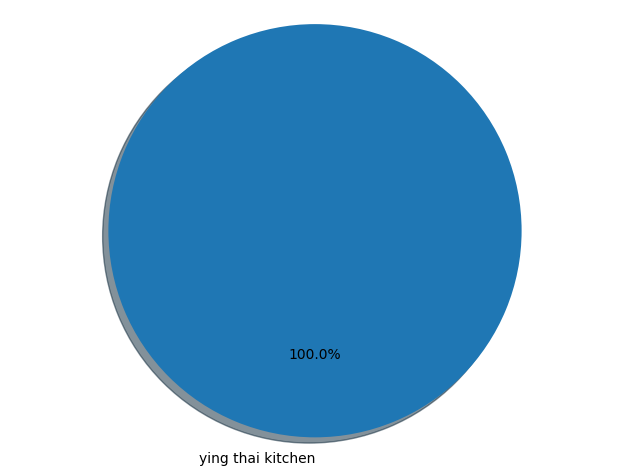

In [ ]:
#its time to make pie chart
#here i will make pie chart using three ways just to see which one fits the best
labels=[]
for i in entertainment['Organisation']:
    labels.append(i)
amount=[]
for i in entertainment['Amount']:
    amount.append(i)
plt.pie(amount, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.tight_layout()
#entertainment.plot(x='organisation',y='amount',kind='barh',title='entertainment expenditure')
plt.show()

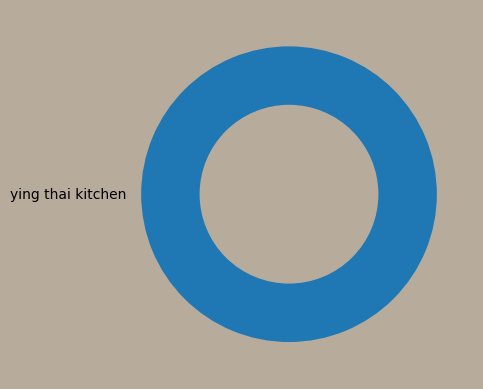

In [ ]:
#yucks this plot is too messy
#lets try other way
#this is donut plot
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('#B7AC9C')
# Change color of text and make a circle
plt.rcParams['text.color'] = 'black'
my_circle=plt.Circle( (0,0), 0.6,color='#B7AC9C' )
# Pieplot + circle on it
plt.pie(amount, labels=labels)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

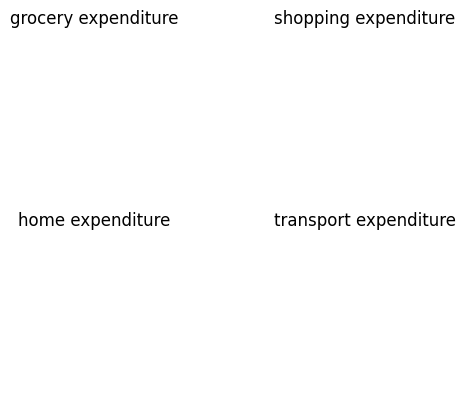

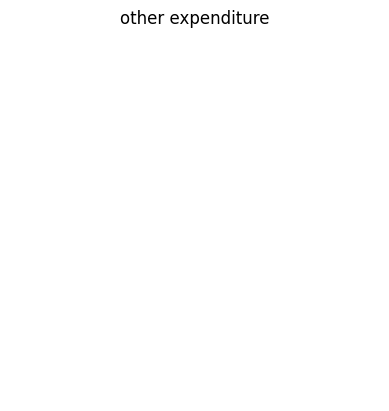

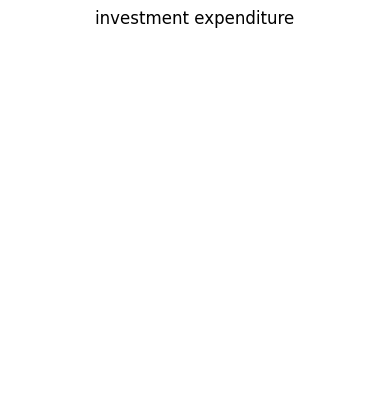

In [ ]:
#this seems nice
#lets do this for other category as well
#similarly we will look at grocery and shopping
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#B7AC9C"]
plt.subplot(221)
plt.pie(grocery['Amount'], labels=grocery['Organisation'],
autopct='%1.1f%%', shadow=True, startangle=140,)
plt.title("grocery expenditure")
plt.subplot(222)
plt.pie(shopping['Amount'], labels=shopping['Organisation'],
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("shopping expenditure")
plt.subplot(223)
plt.pie(home['Amount'], labels=home['Organisation'],
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("home expenditure")
plt.subplot(224)
plt.pie(transport['Amount'], labels=transport['Organisation'],
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("transport expenditure")
#plt.legend(labels)
plt.show()
plt.pie(other['Amount'], labels=other['Organisation'], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("other expenditure")
plt.show()
plt.pie(investment['Amount'], labels=investment['Organisation'], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("investment expenditure")
plt.show()

In [ ]:
#lets merge all the expenditure and save it to other csv
category=['entertainment','investment','shopping','grocery','transport','home','others']
#lets sum all the expenditure category wise
total_entertainment=entertainment['Amount'].sum()
total_investment=investment['Amount'].sum()
total_shopping=shopping['Amount'].sum()
total_grocery=grocery['Amount'].sum()
total_transport=transport['Amount'].sum()
total_home=home['Amount'].sum()
total_others=other['Amount'].sum()
amount=[total_entertainment,total_investment,total_shopping,total_grocery,total_transport,total_home,total_others]

In [ ]:
data={'category':category,'total':amount}

In [ ]:
#here we created a new table which shows the total expenditure of all the category
df = pd.DataFrame(data)

In [ ]:
df.head(10)

,category,total
0,entertainment,12.59
1,investment,0.00
2,shopping,0.00
3,grocery,0.00
4,transport,0.00
5,home,0.00
6,others,0.00


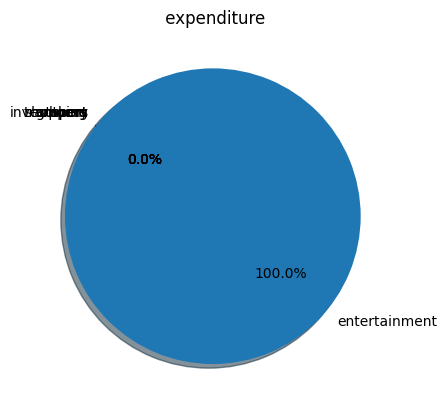

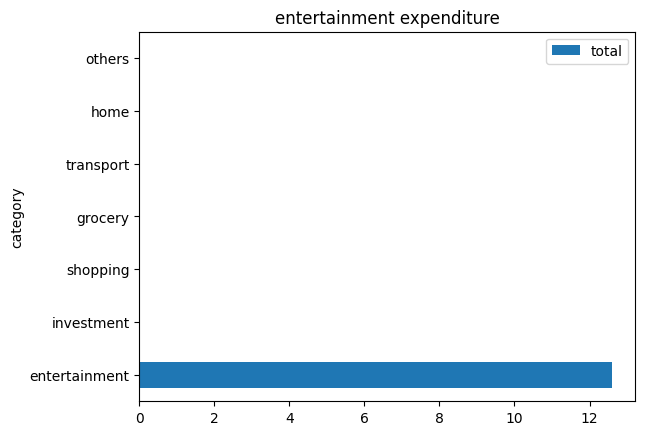

In [ ]:
#lets plot a piechart and bar to analzye where we used
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#B7AC9C"]

plt.pie(df['total'], labels=df['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(" expenditure")

df.plot(x='category',y='total',kind='barh',title='entertainment expenditure')
plt.show()

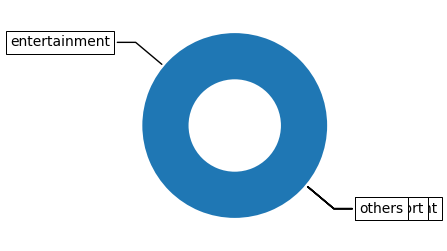

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(df['total'], wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(category[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()


<Axes: title={'center': 'entertainment expenditure'}, ylabel='category'>

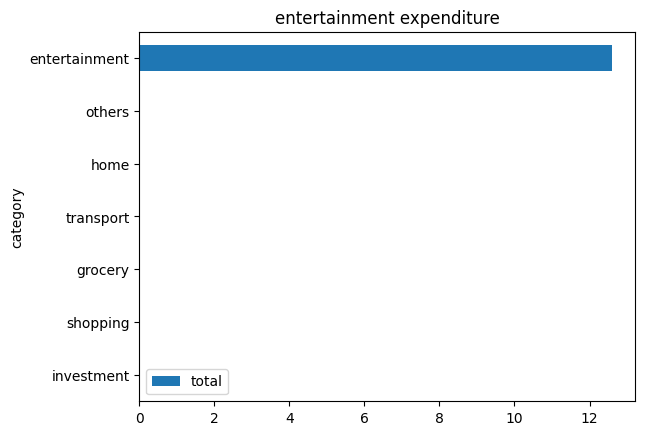

In [ ]:
#wohooo we completed with the piechart
#nowlets move to last question
#lets make a inferance
ordered_df = df.sort_values(by='total')
data_sort=ordered_df

data_sort.plot(x='category',y='total',kind='barh',title='entertainment expenditure')

In [ ]:
#this used to calculate the percentage  of every category
percent=[]
for i in df['total']:
    per=int((i/df['total'].sum())*100)
    percent.append(per)

percent.sort()

In [ ]:
#question4
#from the above graph we can conclude that we have invested maximum money
#now lets see how much we have used in all category
for i in range(len(df)):
    print("{}%  of your expenditure in {} category".format(percent[i],data_sort['category'].iloc[i]))

0%  of your expenditure in investment category
0%  of your expenditure in shopping category
0%  of your expenditure in grocery category
0%  of your expenditure in transport category
0%  of your expenditure in home category
0%  of your expenditure in others category
100%  of your expenditure in entertainment category


conclusion:

Expense data provides detailed insights into entertainment expenditure such as, how much and how frequently the we went for movies and resturant. It is easier for us to cut down on these expenses.

as we can go once a month and we also need to take care of our health. the above Data analytics determined us where to find cost-saving opportunities, validate expenses, and point out the areas to invest more.The investment has maximum as it is necessary to invest for second source of income.The grocery expense detail is not completety true as  grocery vendors in india does not provide bill.the data for grocery used is of supermarket that we go sometimes. the transport category is less as i dont have petrol bills, and we have our own vehical. so we usually don't take taxi. to cut the transportation cost we can use city bus.

here are some money saving tips:
1. evaluate your spending
2. set a montly budget
3. track your spending,if it goes above the limits try to cut down  or spend less the next month in that category
4. plan out your meals for the week so that you can avoid randomly going out and spending unnesscerily
5. cut out cable.wifi is enough ,no need for tv.with services like Hulu, Netflix and Amazon Prime, you can now watch your favorite TV shows and movies for a fraction of the cost of cable TV.
